<a href="https://colab.research.google.com/github/Taejin1221/Lab_Experiment/blob/main/Trajectory_Clustering/Trajectory_Clustering_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import modules

In [1]:
import os, cv2, glob, time
import numpy as np

import matplotlib.pyplot as plt

# Set Constants

In [2]:
# Constants
WIDTH, HEIGHT = 256, 256
CROP_WIDTH, CROP_HEIGHT = 32, 32
CROP_IMAGE_NUMBER = (WIDTH // CROP_WIDTH) * (HEIGHT // CROP_HEIGHT)
print( 'Crop image number:', CROP_IMAGE_NUMBER )

EXPERIMENT_DATA = {
    'name' : 'Trajectory_Clusetring',
    'number' : '41',
    'date' : '11-29-2021',
    'description' : 'Reconstruction image 반전으로 만들기'
    }

ROOT_DIR = os.getcwd()
os.chdir(ROOT_DIR)

GEOLIFE_DIR = os.path.join('C:\\', 'Dataset', 'Geolife')
DATA_DIR = os.path.join(GEOLIFE_DIR, 'Image_Files')

if ( 'Results' not in os.listdir() ):
    os.mkdir( 'Results' )
RESULT_DIR = os.path.join( 'C:\\', 'GitHub', 'Lab_Experiment', 'Results')

plt.gray()

Crop image number: 64


<Figure size 432x288 with 0 Axes>

# Load and Preprocessing Data

## Convert CSV to Image

In [3]:
os.chdir(DATA_DIR)
print(os.listdir()[:10])

['Geolife_trajectory1.png', 'Geolife_trajectory10.png', 'Geolife_trajectory100.png', 'Geolife_trajectory1000.png', 'Geolife_trajectory10000.png', 'Geolife_trajectory10001.png', 'Geolife_trajectory10002.png', 'Geolife_trajectory10003.png', 'Geolife_trajectory10004.png', 'Geolife_trajectory10005.png']


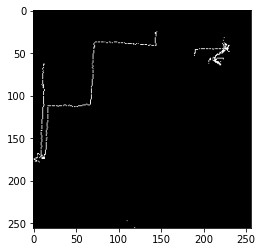

In [4]:
os.chdir(DATA_DIR)

original_images = [ ]
for img in glob.glob('*.png'):
    original_images.append(cv2.imread(img, cv2.IMREAD_GRAYSCALE))

plt.imshow( original_images[0] )
plt.show()

## Crop Image

In [5]:
cnt = 0
cropped_images_train = [ ]
prevTime = time.time()
for image in original_images:
    for i in range( 0, HEIGHT, CROP_HEIGHT ):
        for j in range( 0, WIDTH, CROP_WIDTH ):
            curr_image = [ ]
            for ii in range( i, i + CROP_HEIGHT ):
                curr_image.append( image[ii][j : j + CROP_WIDTH] )
            cropped_images_train.append( curr_image )
    cnt += 1
    if (cnt % 1000 == 0):
        currTime = time.time()
        print(f'count: {cnt}, time: {currTime - prevTime:.2f}')
        prevTime = currTime

count: 1000, time: 0.93
count: 2000, time: 0.98
count: 3000, time: 1.03
count: 4000, time: 0.92
count: 5000, time: 1.05
count: 6000, time: 1.09
count: 7000, time: 0.92
count: 8000, time: 1.12
count: 9000, time: 0.94
count: 10000, time: 1.17
count: 11000, time: 0.92
count: 12000, time: 0.95
count: 13000, time: 1.27
count: 14000, time: 0.94
count: 15000, time: 0.92
count: 16000, time: 1.36
count: 17000, time: 0.92
count: 18000, time: 0.94


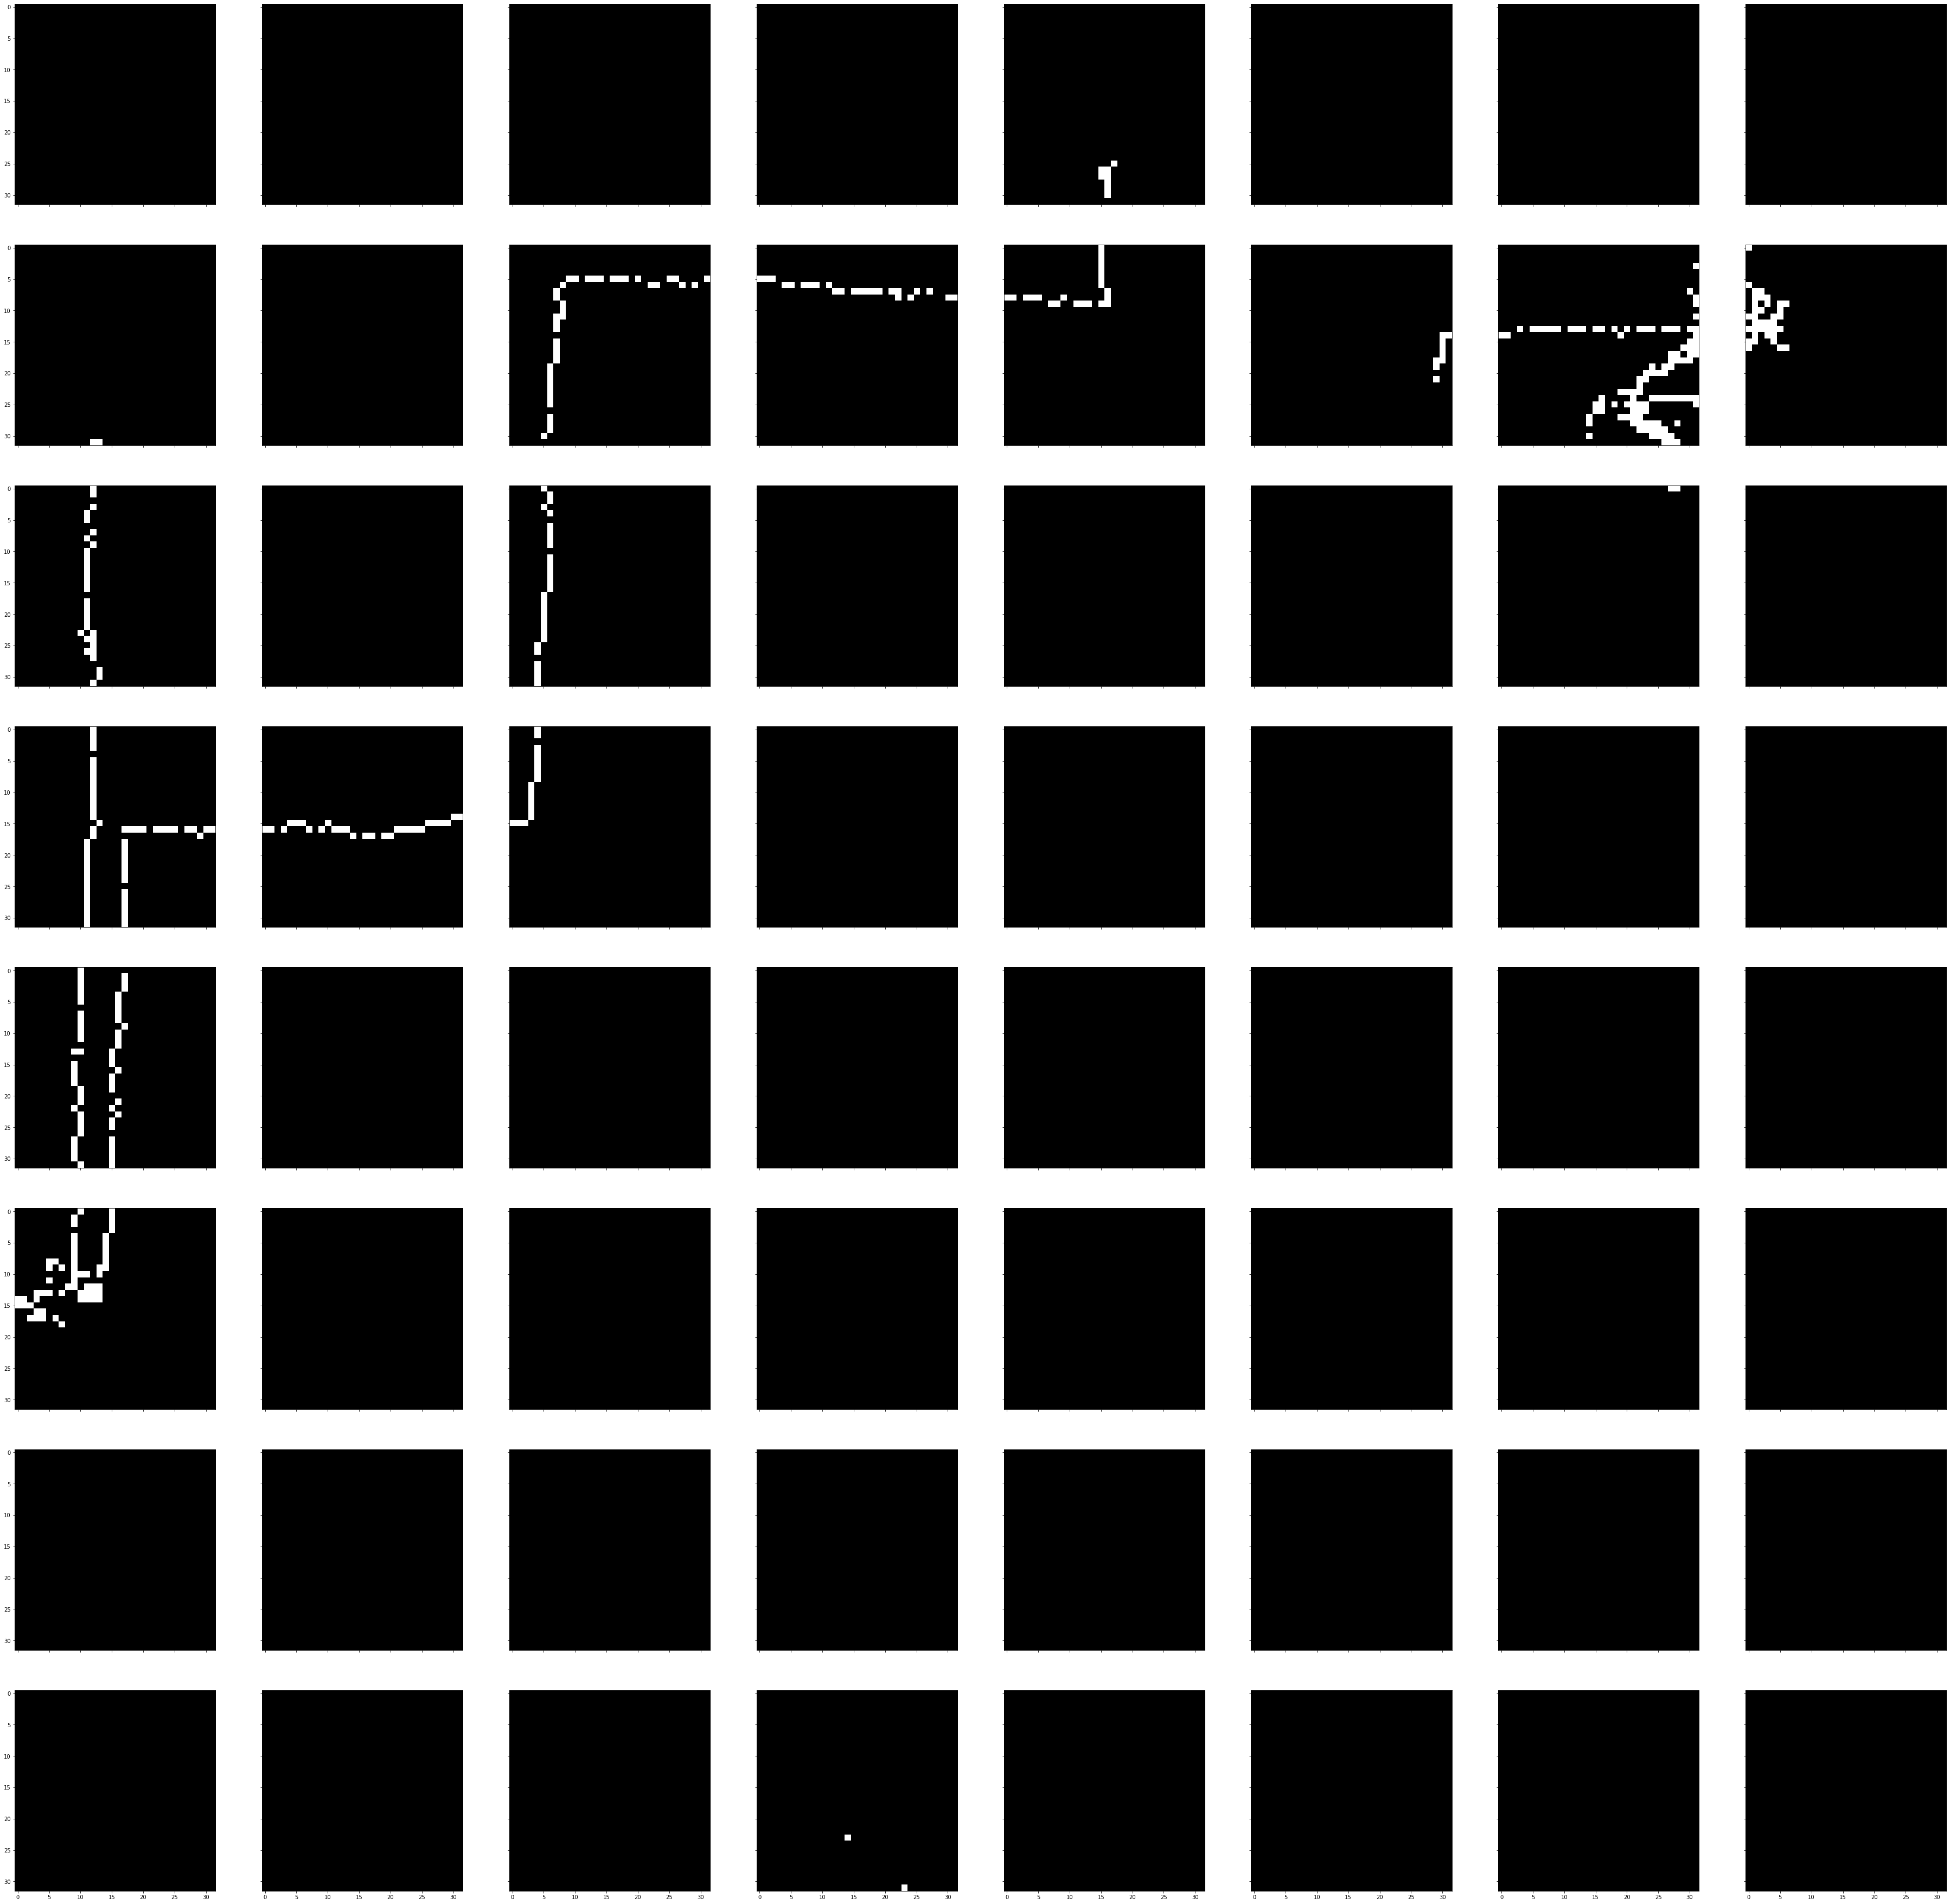

In [6]:
row, col = HEIGHT // CROP_HEIGHT, WIDTH // CROP_WIDTH
fig, ax = plt.subplots( row, col, sharex = True, sharey = True, figsize = ( 64, 64 ) )
for i in range( row * col ):
    ax[i // row][i % col].imshow( cropped_images_train[i] )
plt.show()

In [7]:
print( len(cropped_images_train) )

1194880


In [8]:
X_train = np.array( cropped_images_train ).astype( 'float32' ) / 255.
X_train = np.reshape( X_train, ( -1, CROP_HEIGHT, CROP_WIDTH, 1 ) )

In [9]:
print( X_train.shape )

(1194880, 32, 32, 1)


# Test Model

In [10]:
import tensorflow as tf
from tensorflow import keras

In [11]:
os.getcwd()

'C:\\Dataset\\Geolife\\Image_Files'

In [12]:
os.chdir( RESULT_DIR )
os.chdir('Trajectory_Clusetring_19_06-08-2021_Datas/')

encoder = keras.models.load_model('encoder.h5')
auto_encoder = keras.models.load_model('auto_encoder.h5')

os.chdir(RESULT_DIR)

new_result_dir = f"{EXPERIMENT_DATA['name']}_{EXPERIMENT_DATA['number']}_{EXPERIMENT_DATA['date']}_Data"
os.mkdir( new_result_dir )
os.chdir( new_result_dir )

with open( 'Description.txt', 'w' ) as f:
    f.write( EXPERIMENT_DATA['description'] )

## Check Reconstruction

In [14]:
def hasPoint( array ):
    rowSize, colSize = len( array ), len( array[0] )
    for i in range( rowSize ):
        for j in range( colSize ):
            if ( array[i][j] == 0 ):
                return True
    return False

Trajectory_Clusetring_41_Reconstruction(11-29-2021).png


<Figure size 432x288 with 0 Axes>

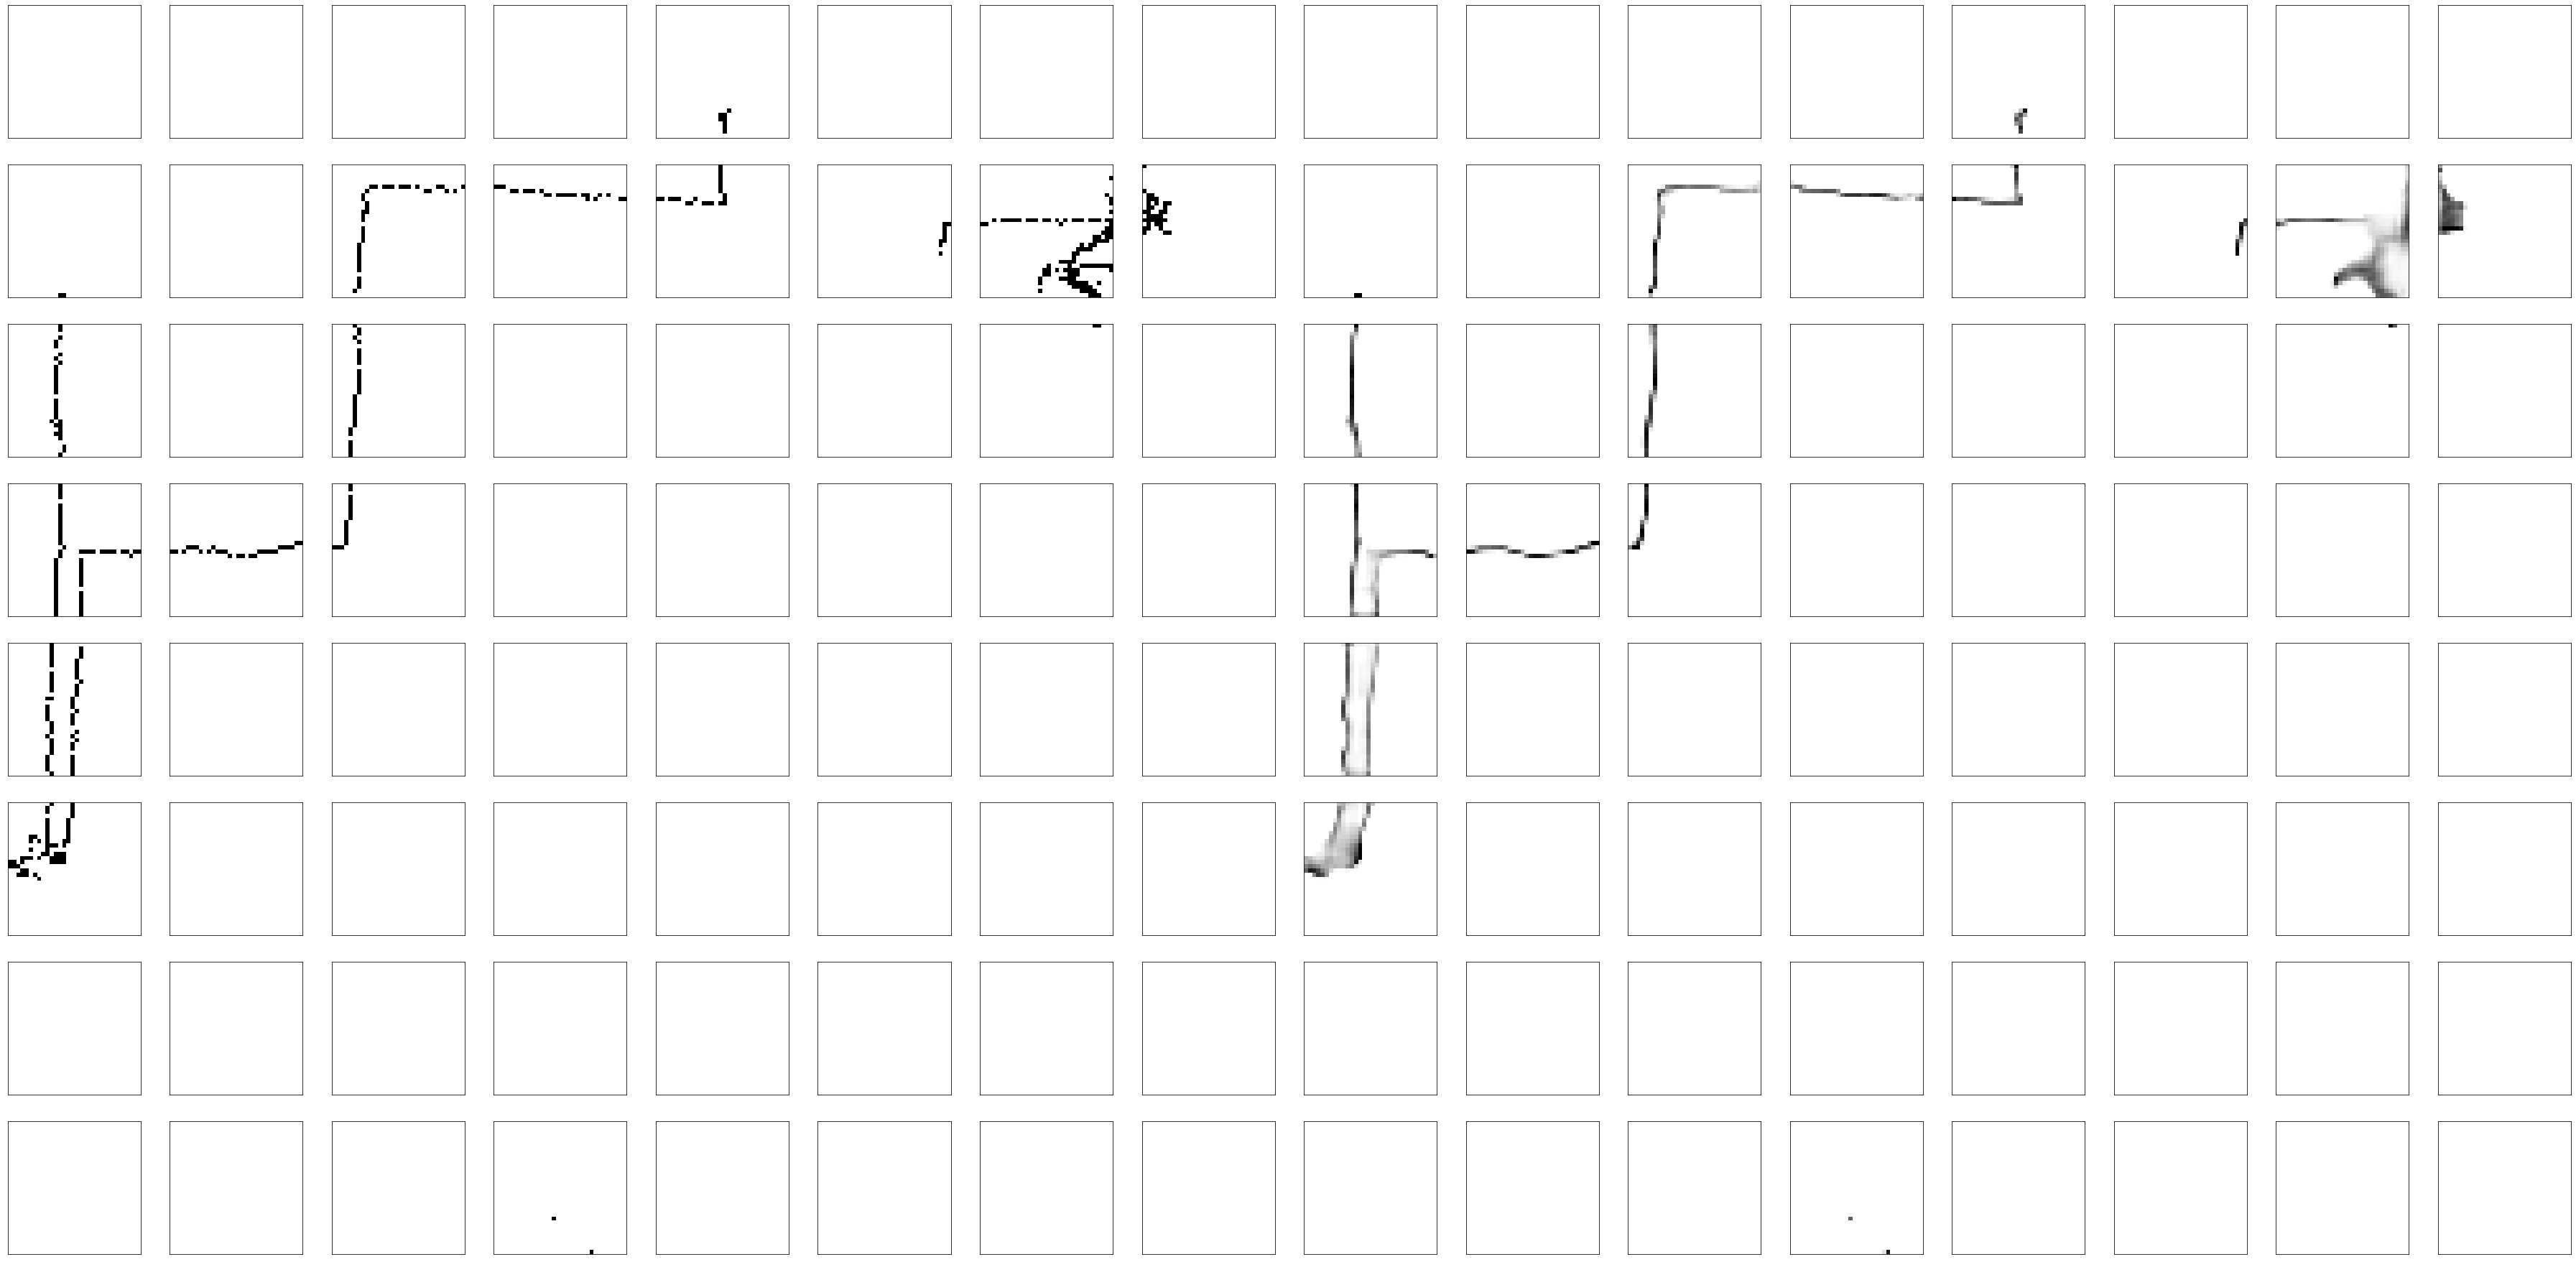

In [28]:
decoded_img = auto_encoder(X_train[:CROP_IMAGE_NUMBER])

plt.gray()

white_image = [[ 255 for _ in range(CROP_WIDTH) ] for _ in range(CROP_HEIGHT)]

row, col = HEIGHT // CROP_HEIGHT, WIDTH // CROP_WIDTH
n = row * col
fig, ax = plt.subplots(row, 2 * col, sharex = True, sharey = True, figsize = (64, 32))
for i in range( n ):
    curr_X_train = X_train[i].reshape(CROP_HEIGHT, CROP_WIDTH)
    ax[i // 8][i % 8].imshow(curr_X_train, cmap = 'Greys', vmin = 0, vmax = 1)
    ax[i // 8][i % 8 + 8].imshow(np.array(tf.reshape(decoded_img[i], (CROP_HEIGHT, CROP_WIDTH))).copy(), cmap = 'Greys', vmin = 0, vmax = 1)
    ax[i // 8][i % 8].xaxis.set_visible(False)
    ax[i // 8][i % 8 + 8].xaxis.set_visible(False)
    ax[i // 8][i % 8].yaxis.set_visible(False)
    ax[i // 8][i % 8 + 8].yaxis.set_visible(False)

result_name = (EXPERIMENT_DATA['name'] + '_'
    + EXPERIMENT_DATA['number'] + '_'
    + 'Reconstruction' + '('
    + EXPERIMENT_DATA['date'] + ').png')
print(result_name)

plt.savefig(result_name, dpi = 100)
plt.show()